# Laboratory session 3

### Le Phuong Linh - 2409897

In [24]:
import networkx as nx

G = nx.read_edgelist("congress_network/congress.edgelist", create_using=nx.Graph())

In [25]:
import matplotlib.pyplot as plt


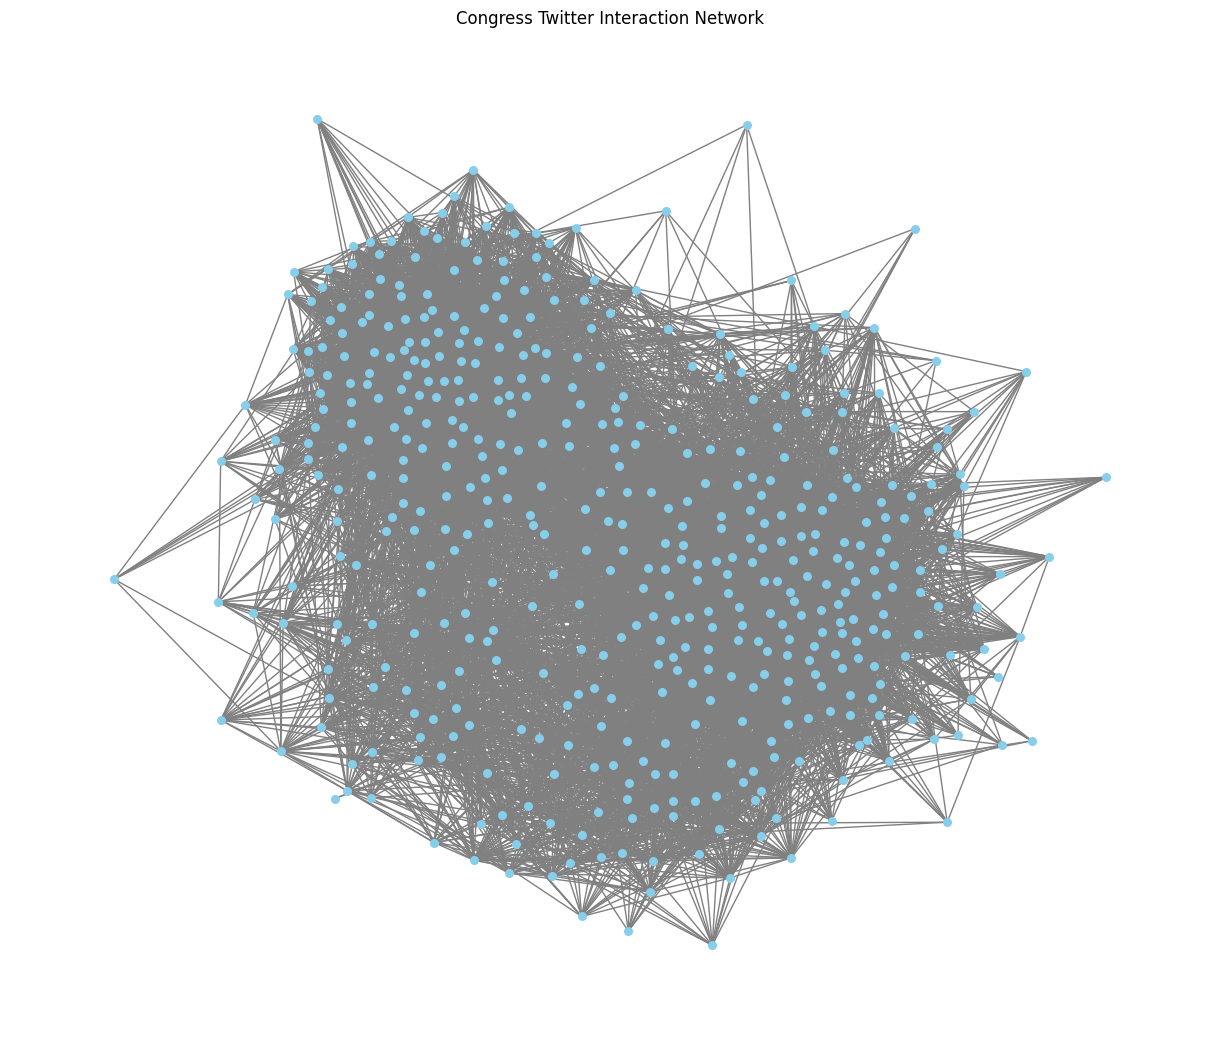

In [26]:
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=False, node_size=30, edge_color='gray', node_color='skyblue')
plt.title("Congress Twitter Interaction Network")
plt.axis('off')
plt.show()

## 1. COMMUNITY DETECTION

In [27]:
from networkx.algorithms.community import girvan_newman

gn_communities = next(girvan_newman(G))
gn_communities = [list(c) for c in gn_communities]

In [28]:
from networkx.algorithms.community import kernighan_lin_bisection

# Split into two communities
rc_communities = kernighan_lin_bisection(G)
rc_communities = [list(rc_communities[0]), list(rc_communities[1])]

In [29]:
from networkx.algorithms.community import label_propagation_communities

lp_communities = list(label_propagation_communities(G))

In [30]:
import community as community_louvain

partition = community_louvain.best_partition(G)
# Convert partition dict to list of communities
lv_communities = {}
for node, comm_id in partition.items():
    lv_communities.setdefault(comm_id, []).append(node)
lv_communities = list(lv_communities.values())

## 2. MODULARITY EVALUATION

In [31]:
from networkx.algorithms.community.quality import modularity


In [32]:
# Girvan–Newman
mod_gn = modularity(G, gn_communities)
print("Girvan–Newman modularity:", mod_gn)

# Ratio Cut
mod_rc = modularity(G, rc_communities)
print("Ratio Cut modularity:", mod_rc)

# Label Propagation
mod_lp = modularity(G, lp_communities)
print("Label Propagation modularity:", mod_lp)

# Louvain
mod_lv = modularity(G, lv_communities)
print("Louvain modularity:", mod_lv)


Girvan–Newman modularity: -8.122792243683691e-08
Ratio Cut modularity: 0.37476637405299607
Label Propagation modularity: 0.36414574824783075
Louvain modularity: 0.44326465464827114


## 3. AVERAGE PATH LENGTH

In [33]:
avg_path_len = nx.average_shortest_path_length(G)
print("Average Path Length:", avg_path_len)

Average Path Length: 2.0638862980235397


## 4. COMMUNITY OVERLAP DETECTION

In [40]:
overlaps = []

print("kernighan_lin_bisection communities:")
for i, comm in enumerate(rc_communities):
    print(f"Community {i}: {sorted(comm)}")

print("label_propagation_communities communities:")
for i, comm in enumerate(lp_communities):
    print(f"Community {i}: {sorted(comm)}")

for i in range(min(len(lp_communities), len(rc_communities))):
    overlap = set(lp_communities[i]) & set(rc_communities[i])
    overlaps.append(list(overlap))

print(overlaps)


kernighan_lin_bisection communities:
Community 0: ['0', '10', '102', '107', '108', '109', '110', '111', '117', '119', '12', '121', '122', '123', '126', '127', '128', '13', '135', '136', '138', '139', '14', '142', '145', '147', '148', '149', '153', '154', '155', '156', '157', '16', '160', '162', '165', '167', '169', '170', '171', '173', '176', '177', '178', '179', '18', '180', '182', '183', '184', '186', '187', '189', '193', '194', '195', '197', '2', '202', '204', '205', '207', '212', '215', '217', '221', '222', '224', '225', '229', '232', '236', '24', '243', '25', '250', '252', '253', '254', '256', '259', '262', '263', '264', '267', '268', '27', '270', '275', '278', '279', '28', '281', '282', '285', '286', '287', '291', '292', '293', '296', '297', '298', '299', '300', '303', '305', '308', '311', '313', '315', '316', '317', '320', '321', '325', '326', '327', '33', '330', '332', '334', '341', '345', '346', '347', '348', '349', '35', '352', '353', '355', '358', '36', '361', '365', '366', 

## 5. Closeness Centrality & Visualization

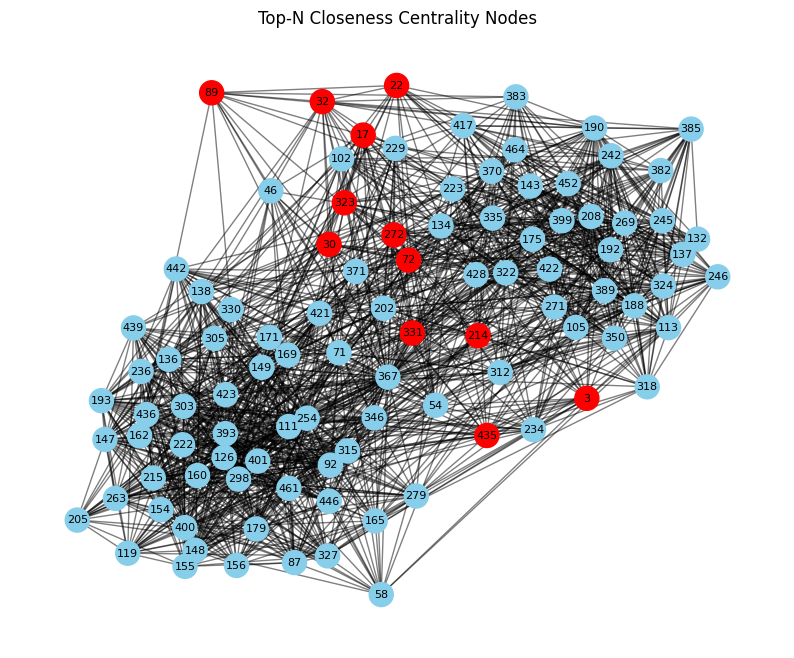

In [35]:
# 1. Compute closeness centrality
closeness = nx.closeness_centrality(G)

# 2. Get top-N nodes
N = 100
top_nodes = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:N]
top_node_ids = [n[0] for n in top_nodes]

# 3. Create subgraph of top-N
H = G.subgraph(top_node_ids)

# 4. Assign colors
overlapping_nodes = set(node for group in overlaps for node in group)
colors = []

for node in H.nodes():
    if node in overlapping_nodes:
        colors.append("skyblue")  # Overlapping community
    else:
        colors.append("red")   # Not in any overlapping community

# 5. Draw
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(H, seed=42)
nx.draw_networkx_nodes(H, pos, node_color=colors, node_size=300)
nx.draw_networkx_edges(H, pos, alpha=0.5)
nx.draw_networkx_labels(H, pos, font_size=8)
plt.title("Top-N Closeness Centrality Nodes")
plt.axis('off')
plt.show()
